In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [56]:
def syntag2(y, t, tc_short, tc_long, stim_func, dopa_func):
    """synaptic tagging model2. time constant of voltage were modulated by dopamine function

    Parameters
    ----------
    y
        tuples of voltage and time constant to be integrated
    t
        time
    tc_short
        short time contant when dopamine does not modulating 
    tc_long
        long time constant when dopamine is modulating
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w, gamma = y
    
    stim = stim_func(t)

    f_w = (-w + stim) / gamma
    f_gamma = -gamma * (gamma - tc_long) * (gamma - tc_short) + dopa_func(stim)

    return [f_w, f_gamma]

In [123]:
DEL_STIM = 1

STIM_START = 0.1
STIM_STOP = STIM_START + DEL_STIM

In [124]:
def stim_func(t):
    if t > STIM_START and t <  STIM_STOP:
        return 1
    return 0

def dopa_func(stim):
    if stim > 0:
        return 1
    else:
        return 0

In [125]:
del_t = 0.01
max_t = 40

t = np.arange(0, max_t, step=del_t)
y0 = 0.1 * np.random.random(2)

sol2 = odeint(syntag2, y0, t, args=(0.25, 0.5, stim_func, dopa_func))
sol2a = odeint(syntag2, y0, t, args=(1.5, 2, stim_func, dopa_func))

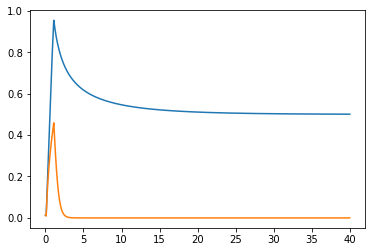

In [126]:
plt.plot(t, sol2[:, 1])
plt.plot(t, sol2a[:, 1])

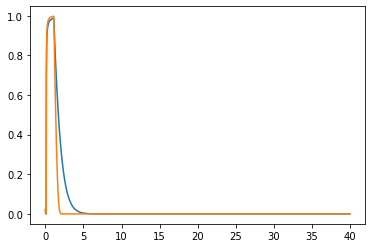

In [127]:
plt.plot(t, sol2[:, 0])
plt.plot(t, sol2a[:, 0])